
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [61]:
import numpy as np
import pandas as pd

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

### 2. Загрузка данных

In [64]:
df = pd.read_csv("sales.csv")
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

In [65]:
df.isna().sum()

SalePrice        0
GrLivArea        0
GarageArea       0
OverallQual      0
Street           0
SaleCondition    0
dtype: int64

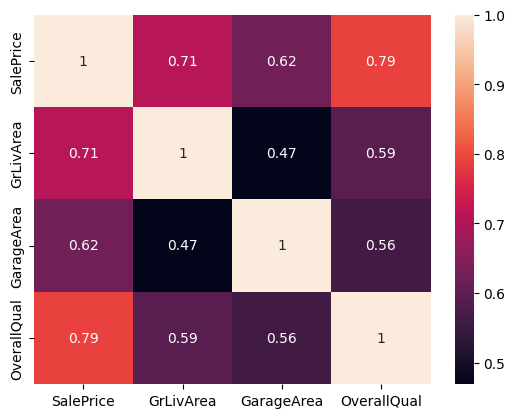

In [66]:
sns.heatmap(df.drop(["Street", "SaleCondition"], axis=1).corr(), annot=True)
plt.show()

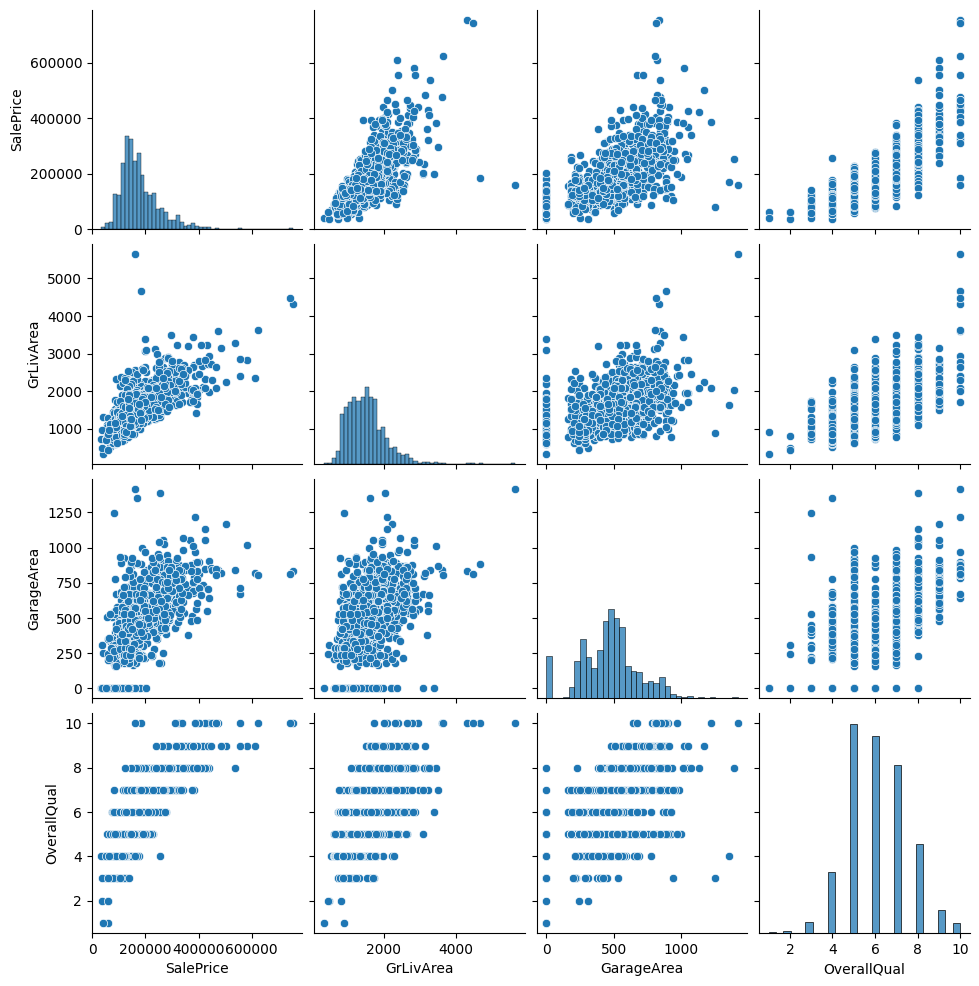

In [67]:
sns.pairplot(df)
plt.show()

In [68]:
df = pd.get_dummies(df, drop_first=False)
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1710,548,7,False,True,False,False,False,False,True,False
1,181500,1262,460,6,False,True,False,False,False,False,True,False
2,223500,1786,608,7,False,True,False,False,False,False,True,False
3,140000,1717,642,7,False,True,True,False,False,False,False,False
4,250000,2198,836,8,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,False,True,False,False,False,False,True,False
1456,210000,2073,500,6,False,True,False,False,False,False,True,False
1457,266500,2340,252,7,False,True,False,False,False,False,True,False
1458,142125,1078,240,5,False,True,False,False,False,False,True,False


In [69]:
df["PricePerSquareMeter"] = df["SalePrice"] / df["GrLivArea"]
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PricePerSquareMeter
0,208500,1710,548,7,False,True,False,False,False,False,True,False,121.929825
1,181500,1262,460,6,False,True,False,False,False,False,True,False,143.819334
2,223500,1786,608,7,False,True,False,False,False,False,True,False,125.139978
3,140000,1717,642,7,False,True,True,False,False,False,False,False,81.537566
4,250000,2198,836,8,False,True,False,False,False,False,True,False,113.739763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,False,True,False,False,False,False,True,False,106.253795
1456,210000,2073,500,6,False,True,False,False,False,False,True,False,101.302460
1457,266500,2340,252,7,False,True,False,False,False,False,True,False,113.888889
1458,142125,1078,240,5,False,True,False,False,False,False,True,False,131.841373


### 4. Разделение на обучающую и тестовую выборки

In [70]:
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=34
)

In [71]:
x.shape, y.shape

((1460, 12), (1460,))

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [72]:
model = LinearRegression()
hist = model.fit(x_train, y_train)

### 6. Получение предсказаний для обучающей и тестовой выборок

In [73]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

### 7. Проверка предсказаний

#### 1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [74]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print("Обучающая выборка:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")


mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("\nТестовая выборка:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")

Обучающая выборка:
MAE: 9925.10
MSE: 273116420.51

Тестовая выборка:
MAE: 13114.39
MSE: 1031102832.03


#### 2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

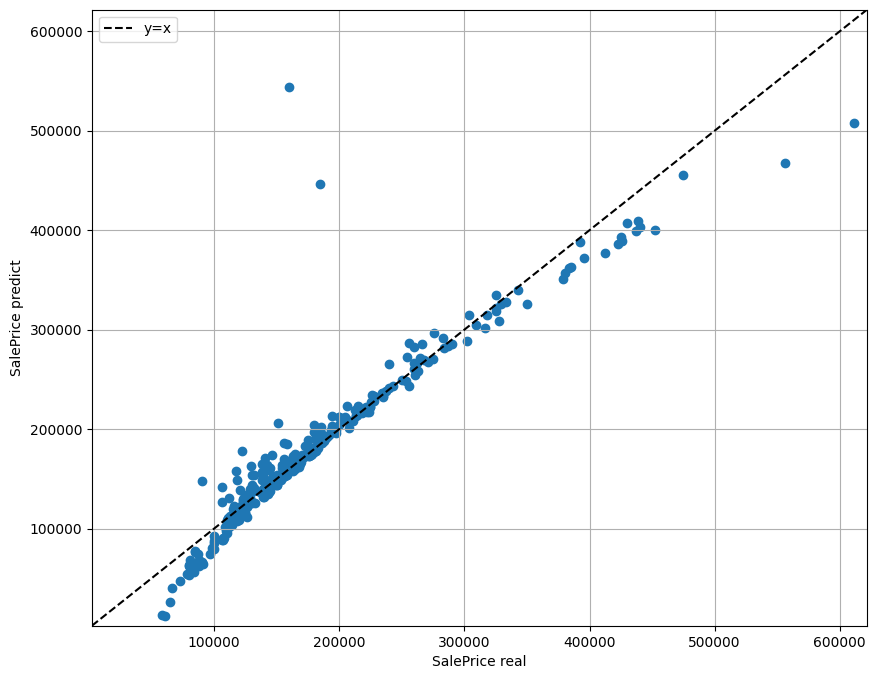

In [75]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred_test)

min_val = min(y_test.min(), y_pred_test.min()) - 1e4
max_val = max(y_test.max(), y_pred_test.max()) + 1e4
plt.plot([min_val, max_val], [min_val, max_val], "k--", label="y=x")

plt.xlabel("SalePrice real")
plt.ylabel("SalePrice predict")

plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

plt.legend()
plt.grid(True)
plt.show()